# SIFT Transform


In [2]:
# %matplotlib ipympl

import cv2
import pandas as pd
from matplotlib import pyplot as plt

### Helpers:


In [2]:
def display(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()


def read_gray(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

### Load data:


<IPython.core.display.Javascript object>


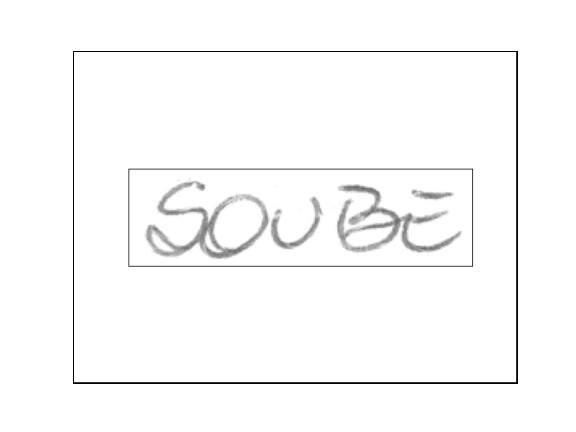

In [3]:
# img = cv2.imread("..\BFL_Database\Cartas Manuscritas\CF00009_01.bmp")
img = cv2.imread("..\Images\BFL-raw.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display(img)

### SIFT:


In [4]:
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(gray, None)

In [10]:
descriptors[0]

array([ 11., 130., 130.,   2.,   1.,  16.,  11.,   1.,  22., 130.,  41.,
         0.,   0.,   0.,   0.,   1.,   2.,  88.,  17.,   0.,   0.,   0.,
         0.,   0.,   0.,  12.,   2.,   0.,   0.,   0.,   0.,   0.,  46.,
        59.,  28.,   4.,  80., 130.,  51.,  13., 130., 104.,   6.,   2.,
         4.,   7.,  10.,  25.,  39., 100.,  20.,   3.,  22.,  21.,  10.,
        14.,  37.,  65.,   5.,   0.,   1.,   0.,   0.,   6.,  35.,  36.,
        13.,  16., 130.,  84.,  47.,  27., 130.,  24.,   4.,  17.,  15.,
        14.,  37., 111.,  58.,   7.,   3.,  31.,  38.,  10.,   4.,  72.,
        49.,   7.,   0.,   0.,   2.,   0.,   1.,  62.,  44.,  12.,   1.,
        11.,  15.,  42.,  84.,  80.,  19.,   0.,   0.,  32.,  18.,  12.,
        57.,  87.,  24.,   0.,   0.,   8.,   2.,   0.,   0., 106.,   5.,
         0.,   0.,   0.,   0.,   0.,   0.,  22.], dtype=float32)

<IPython.core.display.Javascript object>


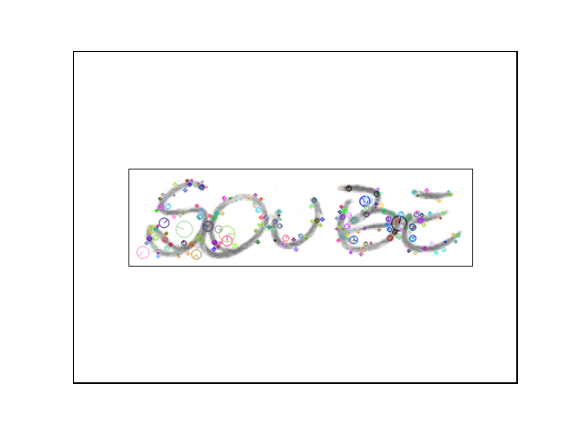

In [5]:
img_with_kp = cv2.drawKeypoints(
    img, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

display(img_with_kp)

In [6]:
kp_dict = [
    {
        "response": keypoint.response,
        "size": keypoint.size,
        "angle": keypoint.angle,
        "octave": keypoint.octave,
        "descriptor": descriptor,
        "pt": keypoint.pt,
        "id": keypoint.class_id,
    }
    for keypoint, descriptor in zip(keypoints, descriptors)
]
df = pd.DataFrame(kp_dict)
df.head()

,response,size,angle,octave,descriptor,pt,id
0,0.041612,2.081451,87.453552,10682879,"[0.0, 0.0, 0.0, 0.0, 119.0, 81.0, 0.0, 0.0, 94...","(62.85020065307617, 2537.238525390625)",-1
1,0.041612,2.081451,255.355103,10682879,"[0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(62.85020065307617, 2537.238525390625)",-1
2,0.045135,2.481371,84.878113,6685439,"[0.0, 0.0, 0.0, 0.0, 115.0, 12.0, 0.0, 0.0, 81...","(67.925048828125, 2535.9873046875)",-1
3,0.045135,2.481371,244.664169,6685439,"[0.0, 0.0, 0.0, 4.0, 6.0, 0.0, 0.0, 0.0, 1.0, ...","(67.925048828125, 2535.9873046875)",-1
4,0.050179,3.166610,81.076294,7603199,"[0.0, 0.0, 0.0, 1.0, 45.0, 1.0, 0.0, 0.0, 42.0...","(71.60442352294922, 2535.008056640625)",-1


#### Keypoints attributes

- **angle**: computed orientation of the keypoint (-1 if not applicable); it's in [0,360) degrees and measured relative to image coordinate system, ie in clockwise.
- **id**: object class (if the keypoints need to be clustered by an object they belong to)
- **octave**: octave (pyramid layer) from which the keypoint has been extracted
- **pt**: coordinates of the keypoints
- **response**: the response by which the most strong keypoints have been selected. Can be used for the further sorting or subsampling
- **size**: diameter of the meaningful keypoint neighborhood
